170508288/170498071 [==============================] - 433s 3us/step


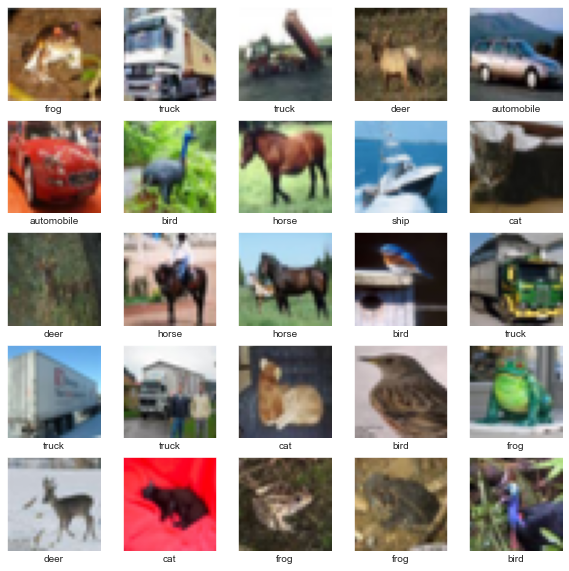

In [2]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# show images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The cifar labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [3]:
from keras import layers
from keras.models import Sequential

cnn = Sequential(
    [
        # convolutional part of the network
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),

        # flatten part of the network
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10)
    ]
)

cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [4]:
from keras.losses import SparseCategoricalCrossentropy

cnn.compile(optimizer='adam',
            loss=SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])

history = cnn.fit(train_images, train_labels, epochs=10,
                  validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 43s 27ms/step - loss: 1.5595 - accuracy: 0.4314 - val_loss: 1.2819 - val_accuracy: 0.5368
Epoch 2/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.1965 - accuracy: 0.5756 - val_loss: 1.1109 - val_accuracy: 0.6066
Epoch 3/10
1563/1563 [==============================] - 28s 18ms/step - loss: 1.0592 - accuracy: 0.6288 - val_loss: 1.0443 - val_accuracy: 0.6357
Epoch 4/10
1563/1563 [==============================] - 39s 25ms/step - loss: 0.9642 - accuracy: 0.6612 - val_loss: 1.0093 - val_accuracy: 0.6515
Epoch 5/10
1563/1563 [==============================] - 41s 26ms/step - loss: 0.8936 - accuracy: 0.6865 - val_loss: 0.9679 - val_accuracy: 0.6654
Epoch 6/10
1563/1563 [==============================] - 29s 19ms/step - loss: 0.8392 - accuracy: 0.7049 - val_loss: 0.9225 - val_accuracy: 0.6799
Epoch 7/10
1563/1563 [==============================] - 24s 15ms/step - loss: 0.7910 - accuracy: 0.7237 - val_loss: 0.9720 -

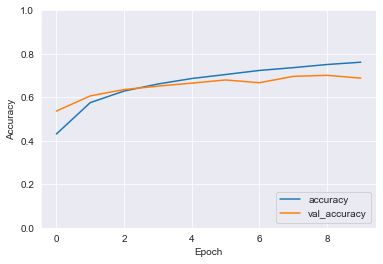

In [8]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

In [9]:
train_images.shape

(50000, 32, 32, 3)

In [10]:
test_labels

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)